# Flight Status Predictor

## Executive Summary

This project is an educational initiative designed to familiarize us with the Machine Learning (ML) Pipeline. While our primary goal is to develop an ML model that predicts significant flight delays, it's important to note that we're focusing on the learning process rather than creating the most robust model possible. The project aims to build a tool that can forecast whether the arrival time of the flight will be delayed by more than 15 minutes. Users input specific details about their flight, and our model provides a straightforward yes or no prediction. This approach allows us to explore and understand each stage of the ML pipeline, from data preparation and feature selection to model training and evaluation.

At the heart of this project is a comprehensive dataset comprising **over 6.7 million flights from April 2023 to March 2024**. This meticulously cleaned and prepared data not only powers our predictive model but also serves as a valuable resource for exploratory data analysis (EDA) and further machine learning applications in the aviation domain.

The project is designed to empower travelers, airlines, and analysts alike. By transforming raw flight data into actionable insights, we're working to enhance travel planning, improve airline operations, and deepen our understanding of air travel patterns. This project bridges the gap between big data and practical applications, ultimately aiming to make air travel more predictable and less stressful for everyone involved.

**What problem are we trying to solve?**

The goal of this project is to **develop and deploy an ML model** in which an end user can specify a set of features describing a commercial flight of interest and receive a categorical (yes or no) output indicating if the arrival time of that flight will be delayed more than fifteen minutes or not. 

**Answer these questions about the data:**
- What variables contribute to a flight being delayed or not upon arrival?
- Which model best represents the data? 

---

In [22]:
# Import libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
%matplotlib inline

In [23]:
# Store CSV file in variable 
flights = r'..\data\DF_from_Feature_Sel_for_Model_Sel.csv'
# Read CSV file in pandas dataframe 
df = pd.read_csv(flights)

In [24]:
# Print dataframe to confirm successful loading
df

,Carrier_Name,Week_Day,Flight_Date,Flight_Number,Origin_City_State,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,Scheduled_Arrival_Time,Scheduled_Gate_to_Gate_Time,Distance_Miles,Distance_Group,delayed
0,United Air Lines Inc.,Tuesday,2023-09-05,773,"Denver, CO","Nashville, TN",Afternoon,1743,2119,156,1014,5,0
1,Delta Air Lines Inc.,Friday,2024-03-29,2641,"Salt Lake City, UT","Seattle, WA",Afternoon,1710,1823,133,689,3,0
2,American Airlines Inc.,Sunday,2023-06-04,2677,"Orlando, FL","Dallas/Fort Worth, TX",Early Morning,550,745,175,985,4,0
3,Delta Air Lines Inc.,Friday,2023-08-04,1451,"Jacksonville, FL","Boston, MA",Early Afternoon,1215,1459,164,1010,5,1
4,Southwest Airlines Co.,Tuesday,2023-04-18,185,"Dallas, TX","Indianapolis, IN",Evening,1955,2255,120,755,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,Thursday,2023-10-26,4815,"Dallas/Fort Worth, TX","Killeen, TX",Morning,1044,1202,78,134,1,1
2742898,Southwest Airlines Co.,Thursday,2023-07-20,4277,"Las Vegas, NV","El Paso, TX",Afternoon,1620,1905,105,583,3,1
2742899,Endeavor Air Inc.,Saturday,2024-01-27,4915,"Des Moines, IA","New York, NY",Early Afternoon,1300,1644,164,1031,5,0
2742900,Southwest Airlines Co.,Thursday,2023-07-20,1817,"Phoenix, AZ","St. Louis, MO",Evening,2015,115,180,1262,6,1


# Data Preprocessing (Data Cleaning and Preparation)

I'm tackling the critical task of data preprocessing. My goal is to transform millions of raw flight records into a clean, analysis-ready dataset. I'm carefully cleaning and structuring the downsampled data from **over 2.7 million** flights, selecting the most relevant features, and ensuring the information is in the best format for our machine learning model. This process not only sets the stage for accurate delay predictions but also creates a valuable resource for broader aviation insights. By focusing on data quality and accessibility, I'm laying the groundwork for both our immediate project goals and future exploratory analyses in the fascinating world of air travel.

<span style="color:red">**NOTE**</span>: This step was mostly taken care of during EDA and Feature Selection, but wanted to still view the data and make any necessary adjustments

In [27]:
df.columns

Index(['Carrier_Name', 'Week_Day', 'Flight_Date', 'Flight_Number',
       'Origin_City_State', 'Destination_City_State', 'Dep_Time_Block_Group',
       'Scheduled_Departure_Time', 'Scheduled_Arrival_Time',
       'Scheduled_Gate_to_Gate_Time', 'Distance_Miles', 'Distance_Group',
       'delayed'],
      dtype='object')

### Check For Correct Dtypes

Checking for correct data types (dtypes) is crucial in data preprocessing as it ensures data integrity and optimizes performance. Proper dtypes facilitate accurate calculations, enable efficient storage, and allow for seamless functionality with data analysis libraries. Moreover, correct dtypes improve machine learning model accuracy and enable more effective feature engineering, which is essential for our flight delay prediction project.

In [29]:
# Get summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742902 entries, 0 to 2742901
Data columns (total 13 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   Carrier_Name                 object
 1   Week_Day                     object
 2   Flight_Date                  object
 3   Flight_Number                int64 
 4   Origin_City_State            object
 5   Destination_City_State       object
 6   Dep_Time_Block_Group         object
 7   Scheduled_Departure_Time     int64 
 8   Scheduled_Arrival_Time       int64 
 9   Scheduled_Gate_to_Gate_Time  int64 
 10  Distance_Miles               int64 
 11  Distance_Group               int64 
 12  delayed                      int64 
dtypes: int64(7), object(6)
memory usage: 272.0+ MB


Columns that need to be converted to Object dtype: 
- Flight_Number

Holding off on converting since some columns will not be needed for analysis

### NULL and Duplicate Values

Checking for **null** records is crucial as they can skew analyses and cause errors in our flight delay prediction model, requiring appropriate handling through imputation or removal. Identifying and addressing **duplicate** records prevents data inflation and bias, ensuring each flight is represented accurately without undue influence on our predictions. These checks are fundamental to maintaining data integrity and building a reliable model, especially given our large downsampled dataset of **2.7+ million** flight records.

In [33]:
# Check for missing values 
print(df.isnull().sum())

Carrier_Name                   0
Week_Day                       0
Flight_Date                    0
Flight_Number                  0
Origin_City_State              0
Destination_City_State         0
Dep_Time_Block_Group           0
Scheduled_Departure_Time       0
Scheduled_Arrival_Time         0
Scheduled_Gate_to_Gate_Time    0
Distance_Miles                 0
Distance_Group                 0
delayed                        0
dtype: int64


In [34]:
# Check for duplicate entries
df[df.duplicated()]

,Carrier_Name,Week_Day,Flight_Date,Flight_Number,Origin_City_State,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,Scheduled_Arrival_Time,Scheduled_Gate_to_Gate_Time,Distance_Miles,Distance_Group,delayed


As stated before during EDA and Feature Selection, there doesn't appear to be any duplicated rows

Remember, during EDA, we already renamed the target variable column **Arr_Delay_At_Least_15_Minutes** to **delayed**

In [37]:
df.columns

Index(['Carrier_Name', 'Week_Day', 'Flight_Date', 'Flight_Number',
       'Origin_City_State', 'Destination_City_State', 'Dep_Time_Block_Group',
       'Scheduled_Departure_Time', 'Scheduled_Arrival_Time',
       'Scheduled_Gate_to_Gate_Time', 'Distance_Miles', 'Distance_Group',
       'delayed'],
      dtype='object')

---

# Feature Selection

Based off the information gathered in Feature Selection using the Phik Coreelation Matrix, the following features will be used for model selection: 

> Categorical Variables:
> - Carrier_Name
> - Dep_Time_Block_Group
> - Flight_Date (Month) - Will need to convert this to actual month (Jan, Feb, Mar, etc.) to avoid ordinality with numbers
>
> Numeric Variables:
> - Scheduled_Arrival_Time
> - Scheduled_Departure_Time
> - Flight_Date (Year)
> - Flight_Date (Day)
> - delayed (target variable)

In [40]:
# Add highly correlated features into a new dataframe 
df_features = pd.DataFrame(data=df[['Carrier_Name', 'Flight_Date', 'Dep_Time_Block_Group', 'Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 'delayed']])
df_features

,Carrier_Name,Flight_Date,Dep_Time_Block_Group,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed
0,United Air Lines Inc.,2023-09-05,Afternoon,2119,1743,0
1,Delta Air Lines Inc.,2024-03-29,Afternoon,1823,1710,0
2,American Airlines Inc.,2023-06-04,Early Morning,745,550,0
3,Delta Air Lines Inc.,2023-08-04,Early Afternoon,1459,1215,1
4,Southwest Airlines Co.,2023-04-18,Evening,2255,1955,1
...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,2023-10-26,Morning,1202,1044,1
2742898,Southwest Airlines Co.,2023-07-20,Afternoon,1905,1620,1
2742899,Endeavor Air Inc.,2024-01-27,Early Afternoon,1644,1300,0
2742900,Southwest Airlines Co.,2023-07-20,Evening,115,2015,1


In [41]:
# Convert 'Flight_Date' to datetime objects
df_features['Flight_Date'] = pd.to_datetime(df_features['Flight_Date'])

# Extract month, year, and day
df_features['Month'] = df_features['Flight_Date'].dt.month
df_features['Year'] = df_features['Flight_Date'].dt.year
df_features['Day'] = df_features['Flight_Date'].dt.day

In [42]:
df_features

,Carrier_Name,Flight_Date,Dep_Time_Block_Group,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed,Month,Year,Day
0,United Air Lines Inc.,2023-09-05,Afternoon,2119,1743,0,9,2023,5
1,Delta Air Lines Inc.,2024-03-29,Afternoon,1823,1710,0,3,2024,29
2,American Airlines Inc.,2023-06-04,Early Morning,745,550,0,6,2023,4
3,Delta Air Lines Inc.,2023-08-04,Early Afternoon,1459,1215,1,8,2023,4
4,Southwest Airlines Co.,2023-04-18,Evening,2255,1955,1,4,2023,18
...,...,...,...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,2023-10-26,Morning,1202,1044,1,10,2023,26
2742898,Southwest Airlines Co.,2023-07-20,Afternoon,1905,1620,1,7,2023,20
2742899,Endeavor Air Inc.,2024-01-27,Early Afternoon,1644,1300,0,1,2024,27
2742900,Southwest Airlines Co.,2023-07-20,Evening,115,2015,1,7,2023,20


In [43]:
# Convert Month to actual month (Jan, Feb, Mar, etc.)
df_features['Month'] = pd.to_datetime(df_features['Month'], format="%m").dt.strftime("%b")

In [44]:
df_features

,Carrier_Name,Flight_Date,Dep_Time_Block_Group,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed,Month,Year,Day
0,United Air Lines Inc.,2023-09-05,Afternoon,2119,1743,0,Sep,2023,5
1,Delta Air Lines Inc.,2024-03-29,Afternoon,1823,1710,0,Mar,2024,29
2,American Airlines Inc.,2023-06-04,Early Morning,745,550,0,Jun,2023,4
3,Delta Air Lines Inc.,2023-08-04,Early Afternoon,1459,1215,1,Aug,2023,4
4,Southwest Airlines Co.,2023-04-18,Evening,2255,1955,1,Apr,2023,18
...,...,...,...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,2023-10-26,Morning,1202,1044,1,Oct,2023,26
2742898,Southwest Airlines Co.,2023-07-20,Afternoon,1905,1620,1,Jul,2023,20
2742899,Endeavor Air Inc.,2024-01-27,Early Afternoon,1644,1300,0,Jan,2024,27
2742900,Southwest Airlines Co.,2023-07-20,Evening,115,2015,1,Jul,2023,20


In [45]:
# Drop unnecessary columns from new dataframe 
df_features.drop(['Flight_Date'], axis=1, inplace=True)

In [46]:
df_features

,Carrier_Name,Dep_Time_Block_Group,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed,Month,Year,Day
0,United Air Lines Inc.,Afternoon,2119,1743,0,Sep,2023,5
1,Delta Air Lines Inc.,Afternoon,1823,1710,0,Mar,2024,29
2,American Airlines Inc.,Early Morning,745,550,0,Jun,2023,4
3,Delta Air Lines Inc.,Early Afternoon,1459,1215,1,Aug,2023,4
4,Southwest Airlines Co.,Evening,2255,1955,1,Apr,2023,18
...,...,...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,Morning,1202,1044,1,Oct,2023,26
2742898,Southwest Airlines Co.,Afternoon,1905,1620,1,Jul,2023,20
2742899,Endeavor Air Inc.,Early Afternoon,1644,1300,0,Jan,2024,27
2742900,Southwest Airlines Co.,Evening,115,2015,1,Jul,2023,20


In [47]:
# Check for missing values 
print(df_features.isnull().sum())

Carrier_Name                0
Dep_Time_Block_Group        0
Scheduled_Arrival_Time      0
Scheduled_Departure_Time    0
delayed                     0
Month                       0
Year                        0
Day                         0
dtype: int64


In [48]:
# Grouping numerical columns and
# Moving the target variable to be the right-most column

# Columns to move
cols_to_move = [
                'Carrier_Name',
                'Dep_Time_Block_Group',
                'Month',
                'Year',
                'Day',
                'Scheduled_Arrival_Time', 
                'Scheduled_Departure_Time'
                ]

last_col = 'delayed'

# Extracting the columns to move
columns_to_move = df_features[cols_to_move]

# Dropping these columns from the DataFrame
df_features.drop(columns=cols_to_move, inplace=True)

# Extracting the last column
last_column = df_features.pop(last_col)

# Reinserting the numerical columns
df_features = pd.concat([df_features, columns_to_move], axis=1)

# Reinserting the last column
df_features[last_col] = last_column

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742902 entries, 0 to 2742901
Data columns (total 8 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Carrier_Name              object
 1   Dep_Time_Block_Group      object
 2   Month                     object
 3   Year                      int32 
 4   Day                       int32 
 5   Scheduled_Arrival_Time    int64 
 6   Scheduled_Departure_Time  int64 
 7   delayed                   int64 
dtypes: int32(2), int64(3), object(3)
memory usage: 146.5+ MB


In [49]:
# Define categorical and numerical features
categorical_features = ['Carrier_Name', 'Dep_Time_Block_Group', 'Month']
numerical_features = ['Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 'Year', 'Day']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Redefine X (features) and y (target) variables
X = df_features[['Carrier_Name', 'Year', 'Month', 'Day', 'Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 
                'Dep_Time_Block_Group']]
y = df_features["delayed"]

# Apply the preprocessing pipeline to X
x_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_preprocessed, y, test_size=0.2, random_state=42)

print(f"x_train shape: {X_train.shape}")
print(f"x_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (2194321, 37)
x_test shape: (548581, 37)
y_train shape: (2194321,)
y_test shape: (548581,)


---

# Model Selection

Model selection is essential because it helps us find the best algorithm and settings for our specific prediction needs. By comparing different models, we can determine which one delivers the most accurate and efficient results for our data. This approach ensures we choose a model that balances performance, complexity, and computational efficiency, leading to more reliable and effective predictions.

Since this is my first time performing model selection, I went with only one model to not overwhelm myself with too many

### Logistic Regression

Logistic regression is a popular model selection technique used for binary classification tasks. It estimates the probability of a binary outcome by fitting a logistic function to the data. This model is particularly useful when the target variable is categorical with two possible outcomes, such as predicting whether a flight will be delayed or not. Logistic regression helps in understanding the relationship between the features and the target (delayed), providing insights into which factors are most influential. It is valued for its simplicity, interpretability, and efficiency in handling linear relationships between features and the target variable.

In [53]:
# Logistic regression model
logreg = LogisticRegression(random_state=42)

# Train and evaluate the model
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Print the results
print("Results of confusion matrix for logistic regression model:")
print(cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Results of confusion matrix for logistic regression model:
[[164918 109501]
 [ 99262 174900]]

True Positives(TP) =  164918

True Negatives(TN) =  174900

False Positives(FP) =  109501

False Negatives(FN) =  99262


The classification report gives us various metrics to determine model performance

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61    274419
           1       0.61      0.64      0.63    274162

    accuracy                           0.62    548581
   macro avg       0.62      0.62      0.62    548581
weighted avg       0.62      0.62      0.62    548581



**Key Findings**
- The F1 score, which balances precision and recall, moderately performs at **63%** for predicting flight delays 

The **ROC (Receiver Operating Characteristic) curve** is a tool used to evaluate the performance of a logistic regression model by plotting the trade-offs between the True Positive Rate (sensitivity) and the False Positive Rate (1 - specificity) across different threshold settings. The ROC curve helps visualize how well the model distinguishes between the two classes. A model with a higher area under the ROC curve (AUC) indicates better overall performance, as it means the model has a higher true positive rate for a given false positive rate. This makes the ROC curve a valuable metric for validating the precision and effectiveness of a logistic regression model in distinguishing between classes.

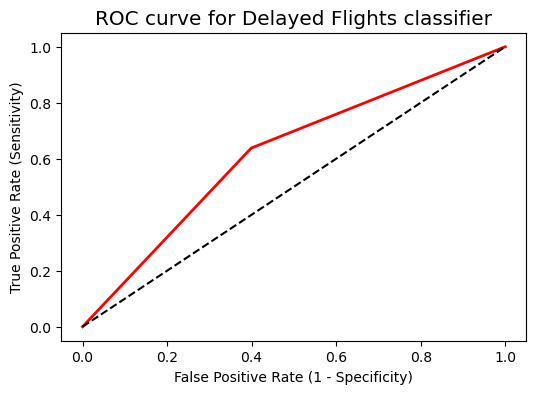

In [55]:
# Calculate ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)

# Initialize figure and axes
plt.figure(figsize=(6,4))
plt.plot(fpr_lr, tpr_lr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Delayed Flights classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [102]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC Score: {0:0.4f}'.format(roc_auc * 100), '%')

ROC AUC Score: 61.9458 %


**Key Observations**
- The ROC AUC Score is about **61.95%**, which means it is somewhat able to distinguish between the two classes (0 - On Time, 1 - Delayed)
- There is room for improvement for this type of model (this will be handled in model creation)

In [58]:
# Calculate Accuracy Rate for Logistic Regression Model
score =accuracy_score(y_test,y_pred)
print('Model accuracy score: {0:0.4f}'.format(score * 100), '%')

Model accuracy score: 61.9449 %


**Key Observations**
- The Accuray Score is about **61.94%**, meaning it classifies approximately **62%** of the instances

In [59]:
# Calculate Error Rate for Logistic Regression Model
ER = ((273665 + 380) / (1081233 + 380 + 273665 + 318)) * 100
print('Model Error Rate: {0:0.4f}'.format(ER), '%')

Model Error Rate: 20.2158 %


**Key Observations**
- The Error Rate is about **20.22%%**, meaning it incorrectly classifies **20%** of the instances

In [60]:
# Print the scores on training and test set
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.6204
Test set score: 0.6194
